In [15]:
import pandas as pd
import nmfTopicModel
from bs4 import BeautifulSoup
import requests

In [11]:
df = pd.read_csv('leavingny.csv'); df.head(2)

,URL,Words,Platform,Query,Title,Description,Language,Published Date,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,https://medium.com/new-york-diary/the-long-hel...,967,Medium,goodbye new york,The Long Hello - New York Diary - Mediummedium...,"Not long ago, I might have written my own 'Goo...",en,2013-12-06,NaN,NaN,NaN,NaN
1,https://medium.com/@EdwardCharles/it-s-not-you...,3036,Medium,goodbye new york,"It's Not You, It's Me. - Ned Dymoke - Mediumme...",They say every writer gets a “Goodbye New York...,en,2015-06-01,NaN,NaN,NaN,NaN


In [16]:
def scrape_story(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    sections = soup.find_all('section')
    story_paragraphs = []
    section_titles = []
    
    for section in sections:
        paragraphs = section.find_all('p')
        for paragraph in paragraphs:
            story_paragraphs.append(paragraph.text)

        subs = section.find_all('h1')
        for sub in subs:
            section_titles.append(sub.text)

    number_sections = len(section_titles)
    number_paragraphs = len(story_paragraphs)
    
    return story_paragraphs


In [17]:
data = {}

for i in range(df.loc[:,'URL'].size):
    try:
        story_txt = scrape_story(df.loc[:,'URL'][i])
        data[i] = story_txt
    except:
        break

In [18]:
textDf = pd.DataFrame.from_dict(data.items()).drop([0], axis=1)
textDf = textDf.rename(columns={1:'text'})

In [19]:
textDf.text = textDf['text'].apply(lambda x: ','.join(map(str, x)))
textDf.head()

,text
0,In Joan Didion’s brilliant and seminal 1967 es...
1,"Ned Dymoke,Jun 1, 2015·13 min read,They say ev..."
2,"Joe Gonzalez,Jun 24, 2015·7 min read,This isn’..."
3,"Gabe Durazo,Jul 31, 2015·2 min read,A few days..."
4,"Pattharin O.,Sep 9, 2015·1 min read,Goodbye Ne..."


cleaning text
vectorizing text
calculating NMF


/opt/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/opt/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


calculating word2vec


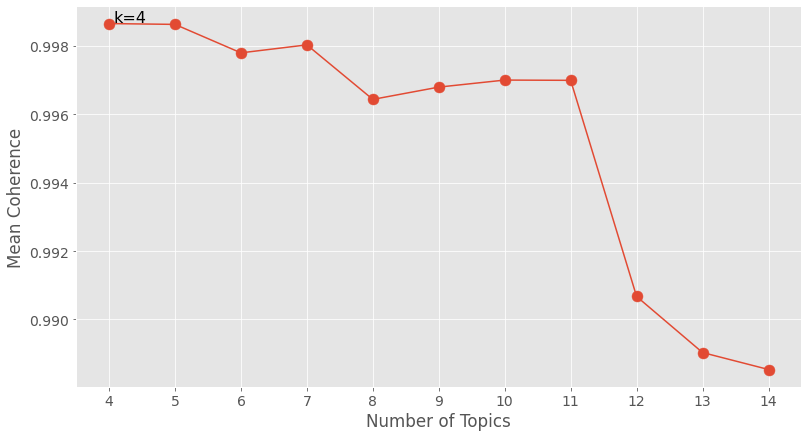

In [21]:
topicModel = nmfTopicModel.Topic_Model(data=textDf['text']).fit()

In [37]:
temp_.loc[:,'ground_truth'].iloc[1:2].values

array(['Jonathan Blair,Dec 5, 2017·1 min read,That’s cool. Don’t write a blog post about it.'],
      dtype=object)

In [38]:
from nmfTopicModel import top_term, get_top_snippets

topic_index, k = 4,4
W = topicModel.nmf[k][0]
H = topicModel.nmf[k][1]
df = topicModel.original_text
terms = topicModel.tfidf_feature_names

sentences = [headline[0:min(len(headline),300)] for headline in df]
descriptors = [top_term(terms(), H, topic_index, 10) for topic_index in range(k)]

labelled = {}
for i in range(k):
    topic = i
    headlines = 10

    d_ = {i+1: sentences
             for i,sentences in enumerate(get_top_snippets(sentences, W, topic, headlines))
        }
    
    labelled[i] = pd.DataFrame.from_dict(d_, orient='index').rename(columns={0:'ground_truth',
                                                                               1:'NMF categorized'})
    
    temp_ = pd.DataFrame.from_dict(d_, orient='index').rename(columns={0:'ground_truth',
                                                                       1:'NMF categorized'})

    print('#''='*30)
    print(f'top terms for topic {topic}')
    print(descriptors[topic])

    print('='*50)
    gt_top = temp_['ground_truth'].value_counts().index[0]
    print(f'top ground truth label: {gt_top}')

    print('='*50)
    print(f'top documents for each topic {topic}')
    print(temp_)
    print('')

#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=
top terms for topic 0
['time', 'like', 'back', 'one', 'day', 'get', 'year', 'work', 'friend', 'life']
top ground truth label: Smita Kolhatkar,Nov 13, 2016·15 min read,The TCS New York Marathon,Being my first marathon outside California and being one after a two year hiatus with barely having come out of an injury, I wasn’t sure what to expect. Yes, of course I was excited to go to New York City. Of course, I was excited be
top documents for each topic 0
                                         ground_truth
1   Smita Kolhatkar,Nov 13, 2016·15 min read,The T...
2   James Altucher,Apr 1, 2014·4 min read,When I f...
3   Sara Melotti,Jan 19, 2017·7 min read,Recently ...
4   Sarah Kay,Sep 11, 2015·8 min read,Here is what...
5   Seandor Szeles,Mar 29, 2014·12 min read,During...
6   Saya Hillman,Sep 8, 2016·13 min read,Last week...
7   Chris Battaglia,Jul 31, 2015·12 min read,These...
8   Cindy Mangus BonDurant,Sep 2, 2017·36 min rea